# Data Visualisation Final Project

## Spotify Data Analysis

The purpose of this project is to analyze Spotify data and answer those questions:
#### 1. Top 10 songs of 2020 in terms of popularity?
#### 2. How did trends change over time (danceability, energy, liveness acousticness)? 
#### 3. What makes a track popular? What features increase/decrease the popularity?
#### 4. How did count of songs with explicit content changed over time?

[Dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks)

Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)


In [4]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Importing packages for analysis

In [5]:
import pandas as pd

import matplotlib.pyplot as plt

import altair as alt

import plotly.express as px

import seaborn as sns

import numpy as np

In [23]:
# data

dataset = pd.read_csv("drive/MyDrive/Data Visualisation Final Project/data/data.csv")
DatasetByArtist = pd.read_csv("drive/MyDrive/Data Visualisation Final Project/data/data_by_artist.csv")
DatasetByYears = pd.read_csv("drive/MyDrive/Data Visualisation Final Project/data/data_by_year.csv")
DatasetByGenre = pd.read_csv("drive/MyDrive/Data Visualisation Final Project/data/data_by_genres.csv")

In [7]:
# data overview
dataset.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [8]:
dataset.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

### Correlation Analysis

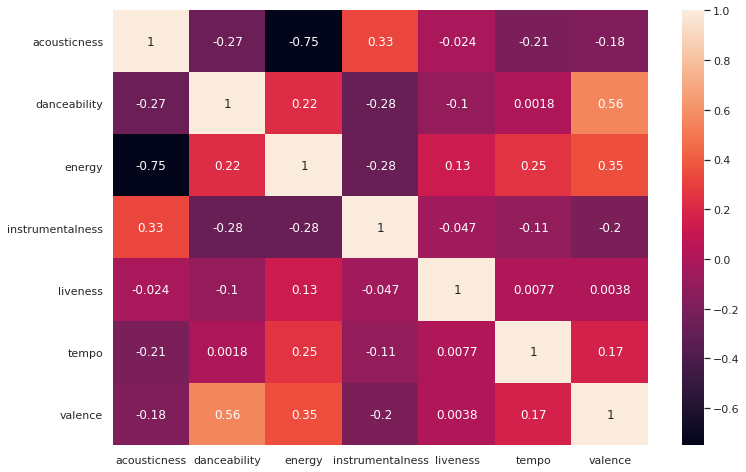

In [10]:
corr = dataset[['acousticness','danceability','energy', 'instrumentalness',
                'liveness','tempo','valence']].corr()

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))

sns.heatmap(corr, annot=True)

### Some finding from correlation analysis
Correlated columns:
#### (energy, acousticness), (valence, dancebility)


## Question 1: Top 10 songs of 2020 in terms of popularity


In [49]:
# sorting data of 2020 year
Songs2010 = dataset[dataset['year'] == 2020]

# adding new column representing artist and song
Songs2010["artists"] = [artist[2: len(artist) - 2].replace("'", "") for artist in Songs2010["artists"]]
Songs2010["Name + Artist"] = Songs2010['artists'] +  " - " + Songs2010['name']

# grouping data by artist and song name
Songs2010 = Songs2010[["Name + Artist",'popularity']].groupby("Name + Artist").mean(
).sort_values(by='popularity', ascending=False)[:10]

# sorting data by popularity
Songs2010 = Songs2010.reset_index().sort_values(by='popularity', ascending=True)
Songs2010

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name + Artist,popularity
8,"Joel Corry, MNEK - Head & Heart (feat. MNEK)",94.0
9,"Sech, Daddy Yankee, J Balvin, ROSALÍA, Farruko...",94.0
5,Tate McRae - you broke me first,95.0
6,"Justin Bieber, benny blanco - Lonely (with ben...",95.0
7,"Justin Bieber, Chance the Rapper - Holy (feat....",95.0
2,Pop Smoke - What You Know Bout Love,96.0
3,"Cardi B, Megan Thee Stallion - WAP (feat. Mega...",96.0
4,The Weeknd - Blinding Lights,96.0
1,"24kGoldn, iann dior - Mood (feat. iann dior)",99.0
0,"Bad Bunny, Jhay Cortez - Dakiti",100.0


In [54]:
fig = px.bar(Songs2010, x='popularity', y='Name + Artist', orientation='h')

# Edit the layout
fig.update_layout(title='Top 10 songs of 2020',
                   xaxis_title='popularity',
                   yaxis_title='Artist and song')

fig.show()

Most popular song of 2020 is: Dakiti by Bad Bunny and Jhay Cortez. To answer this question I used horizontal bar chart sorted by descending order.

# Question 2: How did song trends change over time?

To answer this question let's create time series plot with next features: dancebility, energy, liveness, acousticness, valence.

In [33]:
# grouping data by year
year_avg = dataset[['danceability','energy','liveness','acousticness', 
'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()

year_avg.head()

,year,danceability,energy,liveness,acousticness,valence
0,1921,0.418597,0.231815,0.205710,0.886896,0.379327
1,1922,0.482042,0.237815,0.240720,0.938592,0.535549
2,1923,0.577341,0.262406,0.227462,0.957247,0.625492
3,1924,0.549894,0.344347,0.235219,0.940200,0.663725
4,1925,0.573863,0.278594,0.237668,0.962607,0.621929


In [68]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=year_avg.year, y=year_avg.danceability,
                    mode='lines',
                    name='danceability'))
fig.add_trace(go.Scatter(x=year_avg.year, y=year_avg.energy,
                    mode='lines',
                    name='energy'))
fig.add_trace(go.Scatter(x=year_avg.year, y=year_avg.liveness,
                    mode='lines',
                    name='liveness'))
fig.add_trace(go.Scatter(x=year_avg.year, y=year_avg.acousticness,
                    mode='lines',
                    name='acousticness'))

# Edit the layout
fig.update_layout(title='Songs trends over time',
                   xaxis_title='Year',
                   yaxis_title='Song feature')

fig.show()

### Insights from visualisation

The plot represents data from 1930 to 2020 with features stated above. 

*   Songs with high acousticness have rapidly decreased over time 
*   Songs become more energetic over time - we can observe feature rise over time
*   Dancebility and liveness have remained constant over time

To answer this question I used time series line chart with 4 features which is a good choice for showing overall dynamic over time.




## Question 3: What makes a track popular? What features increase/decrease the popularity?

First, I computed a data frame containing correlation between target feature popularity and other features. Then I filtered data by negative and positive correlation.

In [46]:
# corr df

features_dict = dataset[dataset.columns[2:]].corr()['popularity'][:].to_frame()
features_dict = features_dict.reset_index()

features_dict.columns = ['feature', 'value']
features_dict = features_dict.sort_values(by=['value'])

In [57]:
# negative corr data
negative = features_dict[features_dict['value'] < 0]

positive =  features_dict[features_dict['value'] > 0].reset_index()[:7]
positive

,index,feature,value
0,6,key,0.007826
1,2,duration_ms,0.059597
2,12,tempo,0.133310
3,4,explicit,0.191543
4,1,danceability,0.199606
5,8,loudness,0.457051
6,3,energy,0.485005


In [58]:
fig = px.bar(positive, x='feature', y='value')

# Edit the layout
fig.update_layout(title='Features increasing popularity rate',
                   xaxis_title='Feature',
                   yaxis_title='Value')

fig.show()

Energy and loudness have most effect on popularity rate. Explicit content and dancebility are no relevant to popularity. To answer this question I used bar chart sorted in ascending order.

In [59]:
# negative corr data
negative['value'] = [abs(_) for _ in negative['value']]
negative = negative.sort_values(by=['value'], ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
fig = px.bar(negative, x='feature', y='value')

# Edit the layout
fig.update_layout(title='Features decreasing popularity rate',
                   xaxis_title='Feature',
                   yaxis_title='Value')

fig.show()

Acousticness and instrumentals have negative effect on popularity rate, liveness and speechiness have very small corr rate - no effect. To answer this question I used bar chart sorted in ascending order.

## Question 4: How did count of songs with explicit content changed over time?

In [79]:
explicit_songs = dataset.groupby("year", as_index=False)["explicit"].sum()

fig = go.Figure()

fig.add_trace(go.Scatter(x=explicit_songs.year, y=explicit_songs.explicit,
                    mode='lines',
                    name='danceability'))

# Edit the layout
fig.update_layout(title='Count of explicit songs over years',
                   xaxis_title='Year',
                   yaxis_title='Explicit count')

fig.show()

We can observe clear growth in explicit songs count (from 1950 to 2020). To answer this question I used time series line chart showing count of explicit songs dynamic.